In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model_filepath = 'ResNet18-CIFAR10-Gaussian-Filter.h5'

model = tf.keras.models.load_model(
    model_filepath,
    custom_objects=None,
    compile=False
)
print(model.summary())

Model: "ResNet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   1728        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 64)   256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 64)   0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

1 conv2d_1 (3, 3, 3, 64)


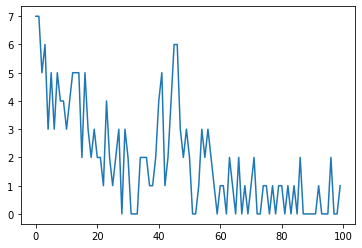

2 conv2d_2 (3, 3, 64, 64)


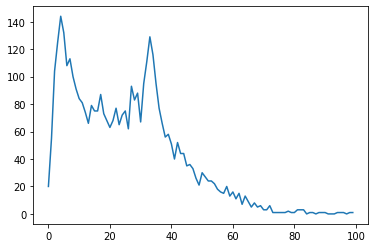

3 conv2d_3 (3, 3, 64, 64)


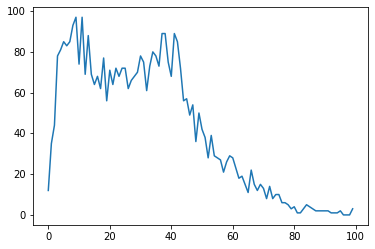

4 conv2d_4 (3, 3, 64, 64)


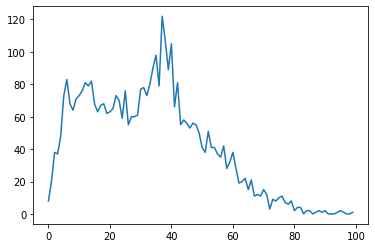

5 conv2d_5 (3, 3, 64, 64)


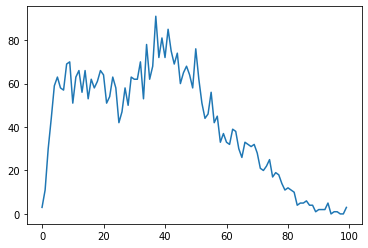

6 conv2d_7 (3, 3, 64, 128)


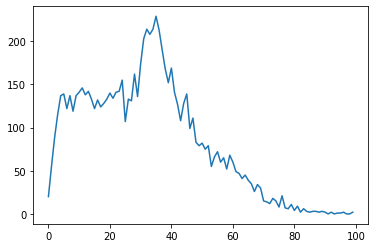

7 conv2d_8 (3, 3, 128, 128)


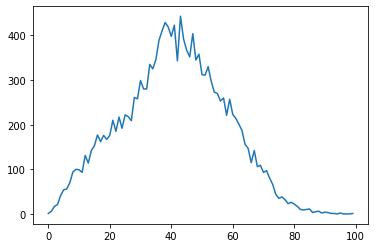

8 conv2d_9 (3, 3, 128, 128)


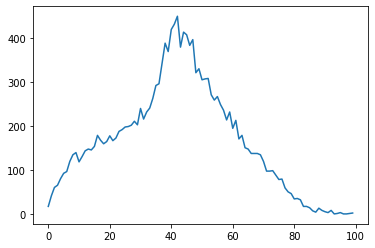

9 conv2d_10 (3, 3, 128, 128)


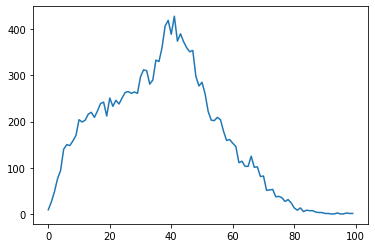

10 conv2d_12 (3, 3, 128, 256)


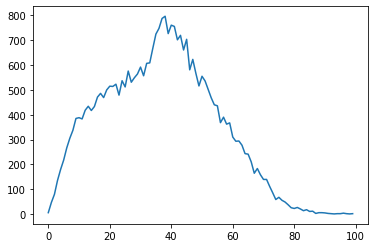

11 conv2d_13 (3, 3, 256, 256)


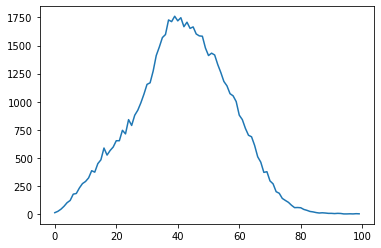

12 conv2d_14 (3, 3, 256, 256)


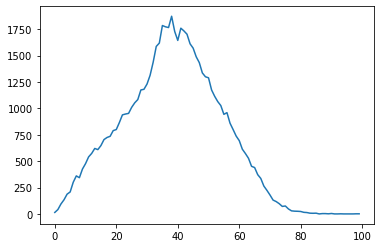

13 conv2d_15 (3, 3, 256, 256)


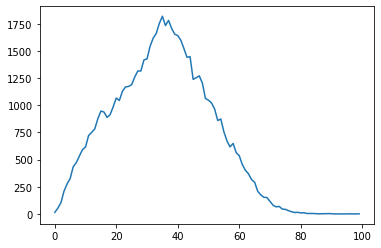

14 conv2d_17 (3, 3, 256, 512)


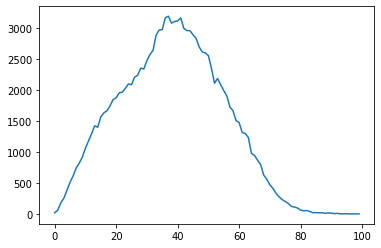

15 conv2d_18 (3, 3, 512, 512)


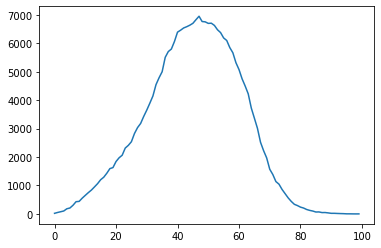

16 conv2d_19 (3, 3, 512, 512)


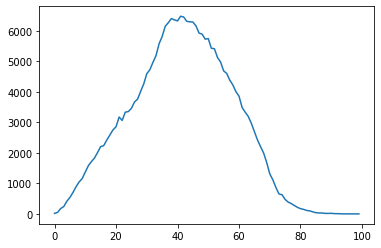

17 conv2d_20 (3, 3, 512, 512)


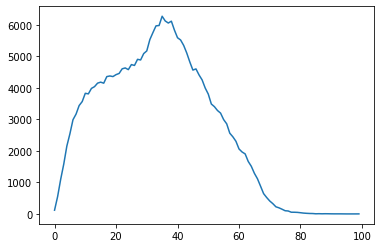

In [3]:
# Iterate over layers
plot_filt=0
n_pad=15
layer_counter=0
for layer in model.layers:
	  # check for convolutional layer
    if 'conv' in layer.name:
        # if filters are 3x3 or larger:
        if layer.kernel.shape[0]>=3 and layer.kernel.shape[1]>=3:
            layer_counter+=1
            list_f_response=np.zeros(layer.kernel.shape[-2]*layer.kernel.shape[-1])
            # summarize kernel shape
            print(layer_counter,layer.name,layer.kernel.shape)
            filter_counter=0
            # Iterate over every 3x3 filter in this layer
            for in_ch in range(layer.kernel.shape[-2]):
                for out_ch in range(layer.kernel.shape[-1]):
                    # pad and fft the filters
                    p_filter=layer.kernel[:,:,in_ch,out_ch]
                    filter_pad=np.pad(p_filter,pad_width=n_pad,mode='constant',constant_values=0)
                    filter_fft=np.fft.fftshift(np.abs(np.fft.fft2(filter_pad))**2)
                    filter_fft=filter_fft/np.sum(filter_fft)
                    # plot some fft examples
                    if filter_counter<plot_filt:
                        plt.imshow(filter_fft)
                        plt.colorbar()
                        plt.pause(1)
                    
                    # get x and y axis to quantify HP/LP structure
                    f_axis_0=np.arange(filter_fft.shape[0])
                    f_axis_0[f_axis_0>np.floor(filter_fft.shape[0]/2)]=np.flip(np.arange(np.floor(filter_fft.shape[0]/2))+1)
                    f_axis_0=np.fft.fftshift(f_axis_0)
                    f_axis_1=np.arange(filter_fft.shape[1])
                    f_axis_1[f_axis_1>np.floor(filter_fft.shape[1]/2)]=np.flip(np.arange(np.floor(filter_fft.shape[1]/2))+1)
                    f_axis_1=np.fft.fftshift(f_axis_1)

                    Y,X=np.meshgrid(f_axis_0,f_axis_1)
                    euc_dist=np.sqrt(X**2+Y**2)
                    mean_f_response=np.mean(euc_dist*filter_fft)
                    list_f_response[filter_counter]=mean_f_response

                    filter_counter+=1
            hist,bins=np.histogram(list_f_response,bins=100)
            plt.plot(hist)
            plt.pause(1)